In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Homework -1

In [254]:
#### BFS route finding

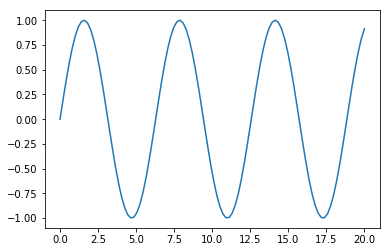

In [254]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

x = np.linspace(0, 20, 100)
plt.plot(x, np.sin(x))
plt.show() 


 ## BFS Path Searching

In [255]:
# define nodes in graph
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = "BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK".split()


In [256]:
# initialize connections
dictionary = {}
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}



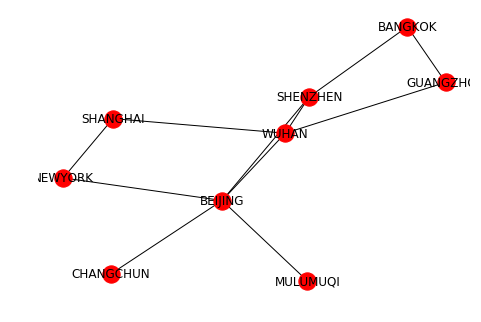

In [257]:
import networkx as nx
graph = connection
g = nx.Graph(graph)
nx.draw(g, with_labels=True)


In [258]:
def navigator(start, destination, graph):
    paths = [[start]]
    seen = set()

    while paths:
        path = paths.pop(0)
        frontier = path[-1]

        if frontier in seen: continue

        next_nodes = graph[frontier]

        for s in next_nodes:
            if s == destination:
                path.append(s)
                return path
            else:
                paths.append(path + [s])
        
        paths = sorted(paths, key=len)
        seen.add(frontier)

In [259]:
path = navigator(BEIJING, GUNAGHZOU, graph)
for i in path:
    print(i)



BEIJING
WUHAN
GUANGZHOU


### 2. Sentence Generation

In [260]:
grammer = '''
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的'''

def parsed_grammmer(grammer_str, sep):
    grammer = {}
    for line in grammer_str.split('\n'):
        line = line.strip()

        if not line: continue
        
        target, rules = line.split(sep)
        grammer[target.strip()] = [r.split() for r in rules.split('|')]
    return grammer
g = parsed_grammmer(grammer, '=>')
print(g)

def gene(grammer_parsed, target='sentence'):
    if target not in grammer_parsed:
        return target
    rule = random.choice(grammer_parsed[target])
    return ''.join(gene(grammer_parsed, target=r) for r in rule if r != 'null')


{'sentence': [['noun_phrase', 'verb_phrase']], 'noun_phrase': [['Article', 'Adj*', 'noun']], 'Adj*': [['null'], ['Adj', 'Adj*']], 'verb_phrase': [['verb', 'noun_phrase']], 'Article': [['一个'], ['这个']], 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']], 'verb': [['看着'], ['坐在'], ['听着'], ['看见']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}


In [261]:
gene(g)



'一个桌子听着一个蓝色的篮球'